# Voice of Customer in Swedish Language with Watson NLP

### What is Watson NLP?

**Watson NLP** is a State-of-the-art NLP stack with full-suite of NLP algorithms and developer-focused UX. It is built on top of the best AI OSS with IBM Research innovations. Available for 30+ languages including European: Western, Nordic, CEE; CJK, Arabic, Hebrew, Hindi, Turkish. 

The following natural language processing tasks are available as blocks in the Watson Natural Language Processing library:

* Syntax analysis
* Keyword extraction and ranking
* Entity extraction
* Sentiment classification
* Etc


Many of the pre-trained models are available in many languages. In this workshop, we will perfrom some of the tasks mentioned above in Swedish. You can test other languages by changing 'sv'/'en' to another language code whenever you see it in a model name. Find a list of available languages and language codes here: https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/watson-nlp-block-catalog.html?audience=wdp#lang-codes

#### We engage you to experiment and try out Watson NLP with your data!

### Import Watson NLP library and create some text in Swedish


The first step is to import Watson NLP, which is already available to us here in IBM Watson Studio Notebooks. (If you are getting errors, **double check** that you selected **'DO + NLP Runtime 22.1 on Python 3.9'** when creating the notebook)

In [ ]:
import watson_nlp

To keep things interesting we created text that we met quite often online in the product reviews left by customers. We make it sure it include mixed sentiment and various entity types, so you can see the beuty of Watson NLP in action. 

The text in English: "I can't handle the delivery! You promised that everything will arrive within 3-5 days. But I received the package on Monday and it took 2 weeks! However, I love Joco's shampoo and conditioner and think they are absolutely worth the 500 SEK".

In [ ]:
#Define Swedish text. To play around with sentiment score we advice you to choose a mix sentiment in that text
sv_text= "Jag orkar inte med leveransen! Ni lovade att allt kommer vara framme inom 3-5 dagar. \
Men jag fick paketet på måndag och det tog 2 veckor! Dock så älskar jag Jocos shampoo och balsam och tycker att de absolut är värda dessa 500 SEK"

### Syntax Analysis

The Watson Natural Language Processing Syntax block encapsulates syntax analysis functionality. You can use this block to perform task like sentence detection, tokenization, part-of-speech tagging, lemmatization and dependency parsing in different languages.

Let's now run the syntax analysis on the Swedish text provided above.

The lemma is the root form of a word. For example, the lemma of 'running' is 'run', 'cats' is 'cat' etc. Part of speech is that thing we learn in high school but may have forgotten about by now, examples include 'noun' and 'adjective'.

In [ ]:
# Load Syntax for Swedish language
syntax_model = watson_nlp.load(watson_nlp.download('syntax_izumo_sv_stock'))

# Detect tokens, lemma and part-of-speech
syntax_prediction = syntax_model.run(sv_text, parsers=('token', 'lemma', 'part_of_speech'))

# Print the syntax result
print(syntax_prediction)

### Sentiment Analysis

In this exercise, we will explore the sentiment models that are available out-of-the-box for Swedish. Start by predicting the sentiment on a sentence level, and then the aggregated sentiment for the full text. In Watson NLP, sentiment can be either 'positive', 'negative', or 'neutral'.

In [ ]:
#Load Sentiment multi-lingual model 
sentiment_model = watson_nlp.load(watson_nlp.download('sentiment_sentence-bert_multi_stock'))


We are now ready to run the sentiment model on the results from the syntax model from the previous section.

For each setence you can see a score. A negative score means that the model predicts that the sentiment is negative. A positive score means that the model predicts that the sentiment is positive. A score of 0 means neutral.

In [ ]:
#Let's see the score for every sentence
sentiment_result = sentiment_model.run_batch(syntax_prediction.get_sentence_texts(), syntax_prediction.sentences)
print(sentiment_result)

Our last step of this exercise is to use the sentiment_result from the previous step and predict the agreggated sentiment for the entire text.

In [ ]:
#Let's see the score for the whole comment left by our customer
from watson_nlp.toolkit import predict_document_sentiment
document_sentiment = predict_document_sentiment(sentiment_result, sentiment_model.class_idxs)
print(document_sentiment)

### Entity Analysis

Watson NLP has 20 entity types in total, where 13 are machine learning entities and 7 are ruled-based entities. 


**ML Entities**: Person,Organization, Location, Facility, Geographic Feature, Job Title, Date, Time, Duration, Money, Measure, Ordinal, Phone Number. 

**Rule-based Entities**: Email Address, IP Address,URL, Twitter Handle,Hash Tag, Number, Percent.

Let's see what entity types are hiden in our example. Here you can compare your human point of view with Watson NLP. We remind you English translation of the text, that Watson will analyse:

"I can't handle the delivery! You promised that everything will arrive within 3-5 days. But I received the package on Monday and it took 2 weeks! However, I love Joco's shampoo and conditioner and think they are absolutely worth the 500 SEK".


In [ ]:
#Download Entity multilingual model
bert_entity_model = watson_nlp.load(watson_nlp.download('entity-mentions_bert_multi_stock'))

In [ ]:
# Run the entity mention model on the result of syntax model
bert_entity_mentions = bert_entity_model.run(syntax_prediction)
print(bert_entity_mentions)

#### Thank you for your interest to Watson NLP! Curious for more?

Here are some useful links:

* Sample Watson NLP project from Gallery in Cloud Pak for Data: https://eu-de.dataplatform.cloud.ibm.com/exchange/public/entry/view/636001e59902133a4a23fd89f010e4cb?context=cpdaas


* IBM official documentation of Watson NLP, you will find all the blocks that are available and what languages are supported for each block: https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/watson-nlp.html?
context=cpdaas&audience=wdp


* See the README.md file in this repository for more useful links.



**This notebook was prapared by IBMers:
Anna K. Lindegren, Malin Uhlander, Sara Elo Dean and Wanmeng He.**


### Any questions?

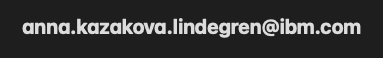